In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('COVID-19-time-series-clean-complete.csv')

In [3]:
data

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
108654,108654,2021-08-06,Vietnam,193381,3016,0.0,190365.0,4315,296,0
108655,108655,2021-08-06,West Bank and Gaza,317703,3611,0.0,314092.0,169,2,0
108656,108656,2021-08-06,Yemen,7131,1384,0.0,5747.0,27,1,0
108657,108657,2021-08-06,Zambia,199135,3459,0.0,195676.0,680,12,0


In [20]:
data['Date'] = pd.to_datetime(data['Date'])
data['DateYearMonth'] = data['Date'].map(lambda date: 100*date.year + date.month)
data.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Month,DateYearMonth
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0,202001,202001
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0,202001,202001
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0,202001,202001
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0,202001,202001
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0,202001,202001


In [21]:
april_2020 = data.query('DateYearMonth == 202004')
april_2020.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Month,DateYearMonth
13510,13510,2020-04-01,Afghanistan,197,4,5.0,188.0,22,0,0,202004,202004
13511,13511,2020-04-01,Albania,259,15,67.0,177.0,16,0,15,202004,202004
13512,13512,2020-04-01,Algeria,847,58,61.0,728.0,131,14,15,202004,202004
13513,13513,2020-04-01,Andorra,390,14,10.0,366.0,14,2,0,202004,202004
13514,13514,2020-04-01,Angola,8,2,1.0,5.0,1,0,0,202004,202004


In [23]:
newcases_april_2020 = april_2020.groupby(['Country/Region'])['New cases'].sum().reset_index()
newcases_april_2020.head(20)

,Country/Region,New cases
0,Afghanistan,1952
1,Albania,530
2,Algeria,3290
3,Andorra,369
4,Angola,20
5,Antigua and Barbuda,17
6,Argentina,3374
7,Armenia,1534
8,Australia,2207
9,Austria,5272


In [24]:
max_newcases_april_2020 = newcases_april_2020.sort_values('New cases', ascending = False).reset_index()
max_newcases_april_2020.head(8)

,index,Country/Region,New cases
0,179,US,888804
1,61,France,140313
2,183,United Kingdom,139956
3,162,Spain,127546
4,178,Turkey,106673
5,142,Russia,104161
6,84,Italy,99671
7,65,Germany,91201


In [52]:
Iran_data_april_2020 = april_2020.loc[(data['Country/Region'] == 'Iran')]
Iran_data_april_2020.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Month,DateYearMonth
13590,13590,2020-04-01,Iran,47593,3036,15473.0,29084.0,2988,138,817,202004,202004
13783,13783,2020-04-02,Iran,50468,3160,16711.0,30597.0,2875,124,1238,202004,202004
13976,13976,2020-04-03,Iran,53183,3294,17935.0,31954.0,2715,134,1224,202004,202004
14169,14169,2020-04-04,Iran,55743,3452,19736.0,32555.0,2560,158,1801,202004,202004
14362,14362,2020-04-05,Iran,58226,3603,19736.0,34887.0,2483,151,0,202004,202004


C:\Users\AmirHvB\AppData\Local\Temp\ipykernel_6864\3049778965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Iran_data_april_2020['Date'] = pd.to_datetime(Iran_data_april_2020['Date'])
C:\Users\AmirHvB\AppData\Local\Temp\ipykernel_6864\3049778965.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Iran_data_april_2020['Day'] = Iran_data_april_2020['Date'].map(lambda date: date.day)


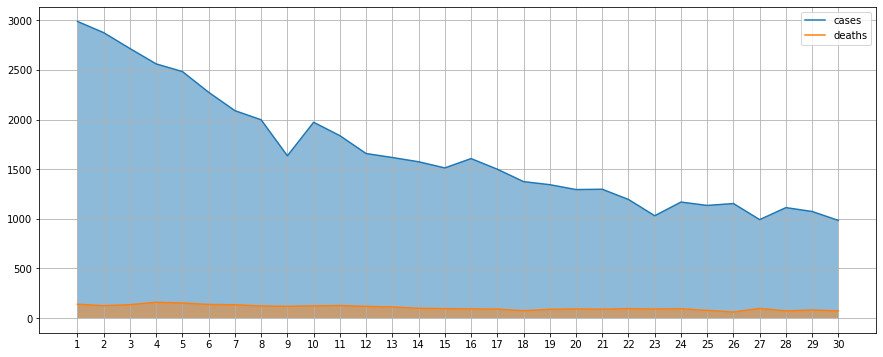

In [56]:
plt.figure(figsize=(15,6))
plt.grid()

Iran_data_april_2020['Date'] = pd.to_datetime(Iran_data_april_2020['Date'])
Iran_data_april_2020['Day'] = Iran_data_april_2020['Date'].map(lambda date: date.day)

x_cases = Iran_data_april_2020['Day'].to_numpy(dtype=str)
y_cases = Iran_data_april_2020['New cases']
plt.plot(x_cases, y_cases, label="cases")

x_deaths = Iran_data_april_2020['Day'].to_numpy(dtype=str)
y_deaths = Iran_data_april_2020['New deaths']
plt.plot(x_deaths, y_deaths, label="deaths")

plt.fill_between(x_cases, y_cases, alpha=0.5)
plt.fill_between(x_deaths, y_deaths, alpha=0.5)

plt.legend(loc='best')
plt.show()